<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_8__Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, shutil


## Prepare dataset

In [ ]:
!unzip cats_and_do

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip -qq '/content/gdrive/MyDrive/cats_and_dogs_small.zip'

In [4]:
original_db_dir = './train'
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


## Create Neural Network

In [12]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
from tensorflow.keras import optimizers

In [16]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Data Preprocessing

In [6]:
from keras.preprocessing.image import ImageDataGenerator

- ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 읽어 전처리 된 배치 텐서
로 자동으로 바꾸어 주는 파이썬 제너레이터를 만들어 줌

In [18]:
train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기: ', data_batch.shape)
  print('배치 레이블 크기: ', labels_batch.shape)
  break

배치 데이터 크기:  (20, 150, 150, 3)
배치 레이블 크기:  (20,)


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_1.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 21s 208ms/step - loss: 0.2801 - acc: 0.8845 - val_loss: 0.3122 - val_acc: 0.8819


In [7]:
import matplotlib.pyplot as plt

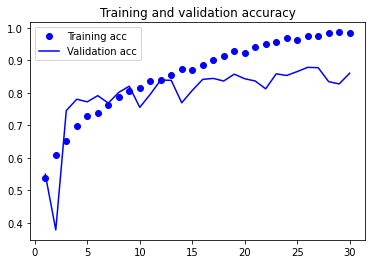

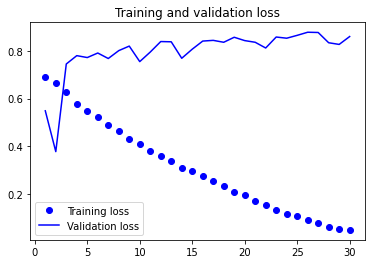

In [ ]:
from tensorflow.python.ops.gen_array_ops import empty_eager_fallback
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
from keras.preprocessing import image

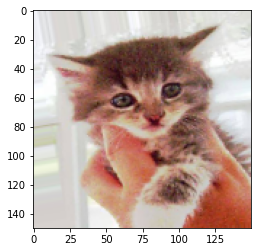

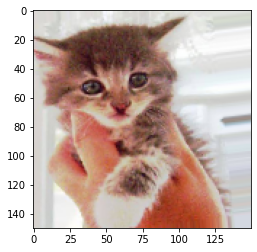

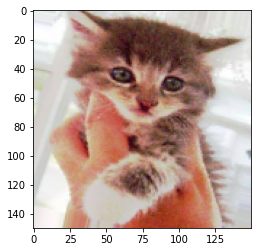

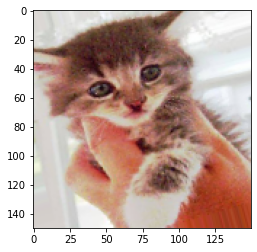

In [ ]:
fnames=sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break

plt.show()


In [14]:
model = models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [16]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 300,
    validation_data = validation_generator,
    validation_steps = 50
)

model.save('cats_and_dogs_small_2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/300
50/50 [==============================] - 27s 316ms/step - loss: 0.6955 - acc: 0.5138 - val_loss: 0.6988 - val_acc: 0.4062
Epoch 2/300
50/50 [==============================] - 16s 315ms/step - loss: 0.6899 - acc: 0.5360 - val_loss: 0.8149 - val_acc: 0.2406
Epoch 3/300
50/50 [==============================] - 16s 315ms/step - loss: 0.6841 - acc: 0.5512 - val_loss: 0.6025 - val_acc: 0.7462
Epoch 4/300
50/50 [==============================] - 16s 316ms/step - loss: 0.6860 - acc: 0.5556 - val_loss: 0.8264 - val_acc: 0.2519
Epoch 5/300
50/50 [==============================] - 16s 311ms/step - loss: 0.6763 - acc: 0.5808 - val_loss: 0.7186 - val_acc: 0.4456
Epoch 6/300
50/50 [==============================] - 16s 328ms/step - loss: 0.6704 - acc: 0.5922 - val_loss: 0.7589 - val_acc: 0.4156
Epoch 7/300
50/50 [==============================] - 16s 315ms/step - loss: 0.6610 - acc: 0.5906 - val_loss: 0.6549 - val_acc: 0.6100
Epoch 8/300
50/50 [==============================] - 16s 312ms